In [2]:
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [3]:
g2 = ig.Graph.Read_GML("C:\\Users\\piotr\\ZZajec_ciekawe_python\\grafy_himalaye\\himalaisci.gml")
components = g2.components()
glownaskladowa = components.subgraphs()[0]

In [18]:
himal = glownaskladowa.subgraph(glownaskladowa.vs[:5000])
components2 = himal.components()
himal5000 = components2.subgraphs()[0]
himal5000nx = himal5000.to_networkx()

In [5]:
print(g2.ecount())
g2.vcount()


610746


41063

### Główna składowa sieci ile wierzchołków i ile krawiędzi

In [16]:
print(himal5000.ecount())
himal5000.vcount()

8830


2698

In [21]:
n = 2698  # węzłów
m = 8830  #krawędzi

In [29]:
# ER
G_er = ig.Graph.Erdos_Renyi(n=n, m=m)
# Model BA
m0 = int(m / n)
G_ba = ig.Graph.Barabasi(n=n, m=m0, directed=False)

G_ernx = G_er.to_networkx()
G_banx = G_ba.to_networkx()

In [56]:
def plot_degree_distribution(G, title):
    degrees = [d for _, d in G.degree()]
    plt.hist(degrees, bins=range(1, max(degrees)+2), edgecolor='black', align='left')
    plt.title(title)
    plt.xlabel('Stopień')
    plt.ylabel('Liczba węzłów')
    plt.show()

def network_summary(G, name):
    density = G.density()
    components = len(G.components())
    if G.is_connected():
        avg_path_length = G.average_path_length()
    else:
        avg_path_length = "Sieć niespójna"
    hubs = [v.index for v in G.vs if v.degree() > 5]
    bridges = G.bridges()
    articulation_points = G.articulation_points()
    bliskosc = G.closeness()
    
    print(f"=== {name} ===")
    print(f"Liczba węzłów: {G.vcount()}")
    print(f"Liczba krawędzi: {G.ecount()}")
    print(f"Gęstość: {density:.4f}")
    print(f"Mosty ile: {len(bridges)}")
    print(f"Huby ile: {len(hubs)}")
    print(f"Przeguby ile: {len(articulation_points)}")
    print(f"Liczba składowych spójnych: {components}")
    print(f"Średnia długość ścieżki: {avg_path_length}")
    print("bliskosć:",sorted(enumerate(bliskosc), key=lambda x: x[1], reverse=True)[:5])
    print()


In [58]:
# Podsumowania
network_summary(himal5000, "Sieć rzeczywista")
network_summary(G_er, "Sieć Erdos-Renyi")
network_summary(G_ba, "Sieć Barabasi-Albert")

=== Sieć rzeczywista ===
Liczba węzłów: 2698
Liczba krawędzi: 8830
Gęstość: 0.0024
Mosty ile: 509
Huby ile: 815
Przeguby ile: 460
Liczba składowych spójnych: 1
Średnia długość ścieżki: 4.538949875118635
bliskosć: [(531, 0.3963262307127112), (1741, 0.34195511601369344), (778, 0.3408315430304562), (1610, 0.33894683926102803), (992, 0.33788524179403656)]

=== Sieć Erdos-Renyi ===
Liczba węzłów: 2698
Liczba krawędzi: 8830
Gęstość: 0.0024
Mosty ile: 26
Huby ile: 1688
Przeguby ile: 26
Liczba składowych spójnych: 6
Średnia długość ścieżki: Sieć niespójna
bliskosć: [(1550, 0.263070458321118), (136, 0.26024748646558393), (1791, 0.25924499229583975), (199, 0.2584981755329364), (1651, 0.2578544061302682)]

=== Sieć Barabasi-Albert ===
Liczba węzłów: 2698
Liczba krawędzi: 8088
Gęstość: 0.0022
Mosty ile: 0
Huby ile: 814
Przeguby ile: 0
Liczba składowych spójnych: 1
Średnia długość ścieżki: 3.9889295769150745
bliskosć: [(0, 0.3827703661652001), (5, 0.3800197266450613), (1, 0.36441021483583297), (3, 

bliskość -> ma największą bliskość dla top5 graf rzeczywisty, to znaczy, że najłatwiej dojść do tych wierzchołków (z top5) mimo, że BA ma nawet więcej krawiędzi minimalnie.   

mosty, przegłubyn -> dla sieci rzeczywistej 509 i 460, oznacza to, że nie jest tak mało wierzchołków, których usnięcie dzieli graf, jakiś szerp to np. jedyna część wspólna między ludżmi w grafie  
dla ER 26 mostów i prze. widąć jasno, że dużo więcej pojawia się przegłóbów i mostów w sieci rzeczywuistej, nie wspominając już o BA(więcej krawiędzi, nie ma dużej liczby połaczeń do wielu wierzchołków).
  
Wnioski: najwięcej ważnych krawiędzi i wierzchołków (które mają dużo połączeń z różnymi miejscami w grafie)  

huby -> najwięcej dla er, podobnie dla ba i rzecz. tutaj najwyrażniej w sieci dla wierzchołków więcej niż 5 nie ma nic ciekawego, er ma dużo więcej, bo jak potem zobaczymy rozkłądu wierzchołków ma przesunięte w prawo.

liczba współ. składowych ->  er inaczej, znowu ba i rzecz. tak samo, jak widać, jeśli wybrałem wspólną skłąd. dla rzecz. to ma przegłuby, ale nie ma więcej niż 1 spojnej składowej, w przypadku losowych, albo graf niespójny, albo nie ma przeg. i mostów.

Średnia długość ścieżki -> w rzeczywistej jest więcej na peryferiach, dlatego średnia ścieżka jest dłuższa niż dla ba.




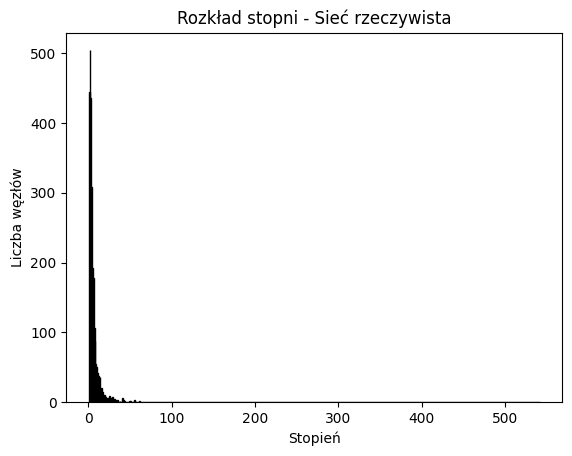

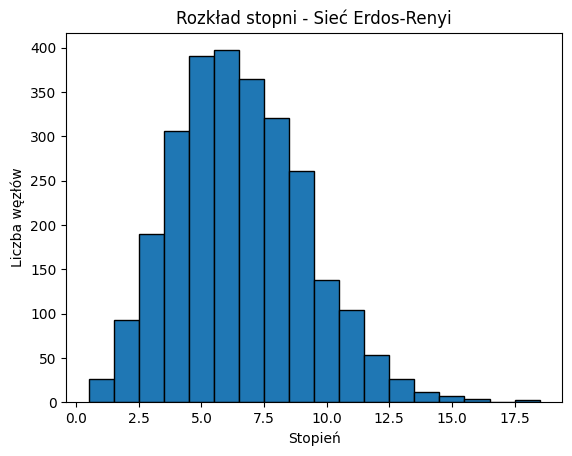

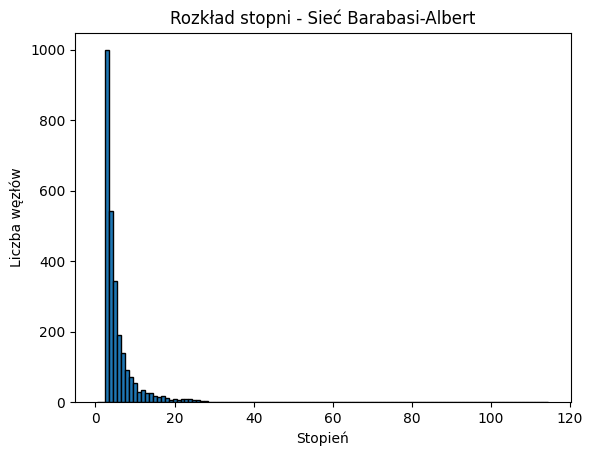

In [31]:
# Rozkłady stopni
plot_degree_distribution(himal5000nx, "Rozkład stopni - Sieć rzeczywista")
plot_degree_distribution(G_ernx, "Rozkład stopni - Sieć Erdos-Renyi")
plot_degree_distribution(G_banx, "Rozkład stopni - Sieć Barabasi-Albert")

Wnioski: Dla sieci rzecz. (silne zróżnicowanie ról w sieci) najwięcej małych koszyczków dlatego, ze są pojedyńcze wierzchołki o dużo większej liczbie krawiędzi niż losowane są z Ba, er nie ma postaci bezskalowej, przypomina rozklad normalny.

In [34]:
def run_louvain(G):
    partition = G.community_multilevel()
    modularity = partition.modularity
    return partition, modularity

def community_summary(G, name):
    partition, modularity = run_louvain(G)
    group_sizes = [len(community) for community in partition]
    clustering_coeff = G.transitivity_undirected()

    print(f"=== {name} ===")
    print(f"Liczba grup: {len(partition)}")
    print(f"Współczynnik grupowania: {clustering_coeff:.4f}")
    print(f"Modułowość: {modularity:.4f}")

    # Wykres rozkładu wielkości grup
    plt.figure()
    plt.bar(range(1, len(group_sizes) + 1), group_sizes)
    plt.xlabel('Numer grupy')
    plt.ylabel('Liczba węzłów w grupie')
    plt.title(f'Rozkład wielkości grup - {name}')
    plt.show()

=== Rzeczywista sieć ===
Liczba grup: 52
Współczynnik grupowania: 0.1532
Modułowość: 0.7229


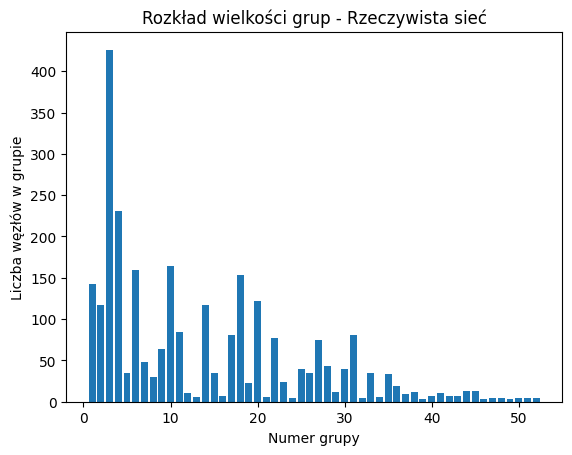

=== Sieć losowa ER ===
Liczba grup: 29
Współczynnik grupowania: 0.0023
Modułowość: 0.3639


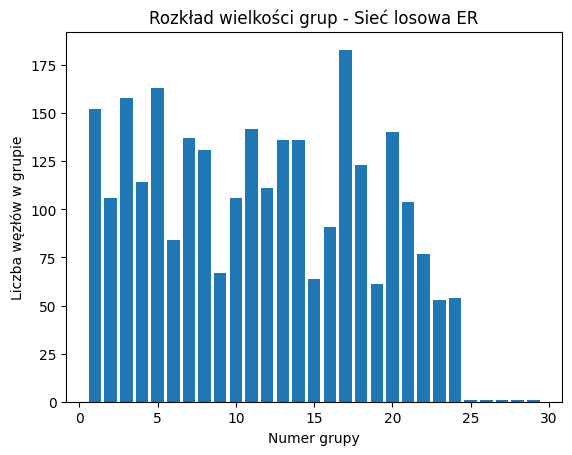

=== Sieć losowa BA ===
Liczba grup: 20
Współczynnik grupowania: 0.0083
Modułowość: 0.3943


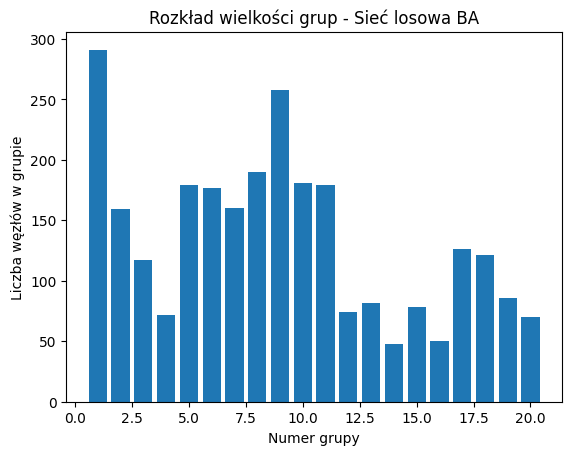

In [35]:
community_summary(himal5000, "Rzeczywista sieć")
community_summary(G_er, "Sieć losowa ER")
community_summary(G_ba, "Sieć losowa BA")

#### Jaśno widać, że dla naszej sieci rzeczywistej, nie przypadkowe jest czemu node jest w jakiejś grupie czemu nie jest, są duże różnice w liczebności grup -> 400 a nie 100 jak w er i nie 200 jak w ba.

In [59]:
def draw_graph(G, title, node_color_property="degree"):
    pos = nx.spring_layout(G, seed=42)
    if node_color_property == "degree":
        degrees = dict(G.degree())
        node_colors = [degrees[n] for n in G.nodes()]
    else:
        node_colors = "lightblue"

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=3, node_color=node_colors, cmap=plt.cm.viridis)
    nx.draw_networkx_edges(G, pos, edge_color="red", alpha=0.8, width=0.5)
    # nx.draw_networkx_labels(G, pos, font_size=2)
    plt.title(f"{title} (node color: {node_color_property})")
    plt.show()

def draw_communities(G, communities, title):
    pos = nx.spring_layout(G, seed=42)
    color_map = {}
    for idx, community in enumerate(communities):
        for node in community:
            color_map[node] = idx

    node_colors = [color_map[n] for n in G.nodes()]

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_size=3, node_color=node_colors, cmap=plt.cm.tab20)
    nx.draw_networkx_edges(G, pos, edge_color="white", alpha=0.8, width=0.5)
    plt.title(f"{title} - Detected Communities")
    plt.show()

def process_network(G,Gig,title):
    partition = Gig.community_multilevel()
    # Zamiana na listę zbiorów wierzchołków
    communities = [set(community) for community in partition]
    
    # 2. Wizualizacja wg stopni
    draw_graph(G, f"{title} - Full Network", node_color_property="degree")


    # 3. Wizualizacja społeczności
    print(f"{title} - Liczba społeczności: {len(communities)}")
    draw_communities(G, communities, f"{title}")

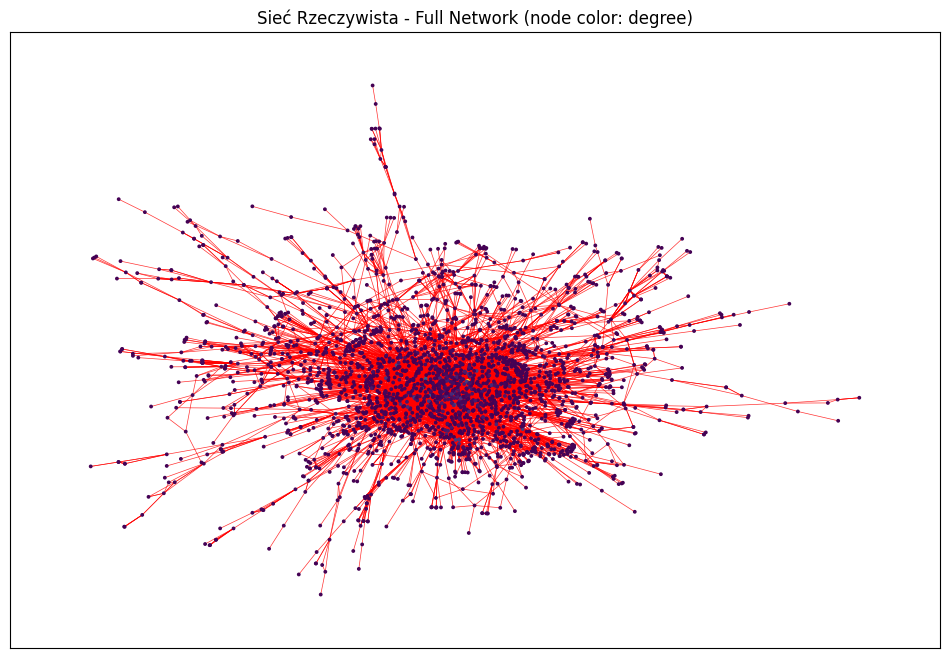

Sieć Rzeczywista - Liczba społeczności: 49


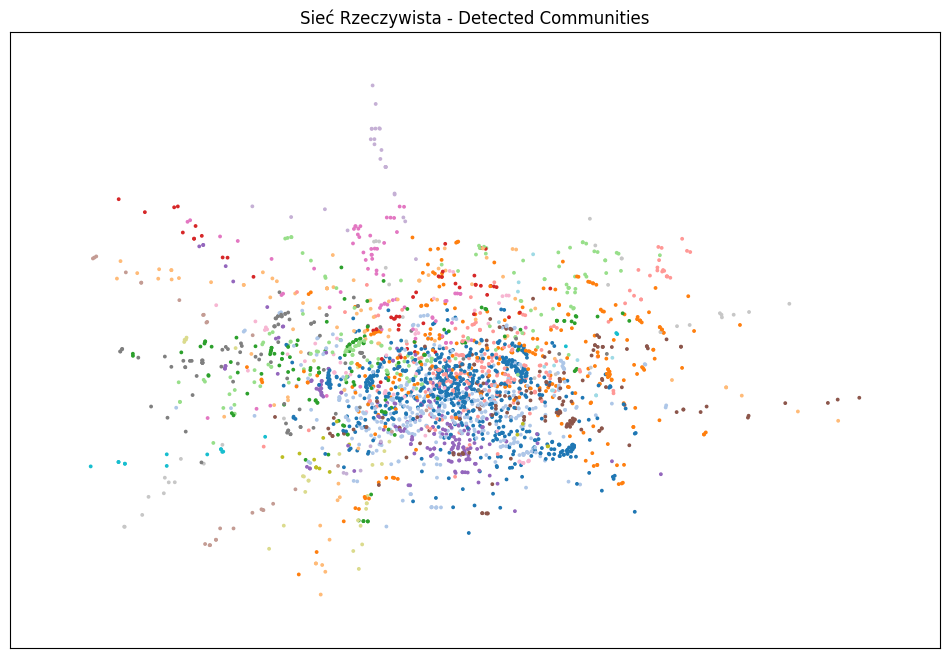

In [49]:
process_network(himal5000nx,himal5000, "Sieć Rzeczywista")

#### Skruktura jest spłaszczona widzimy, że jest sporo nodów odstających i trzeba się dobrze przyjżeć, żeby zobaczyć inne kolory niż fioletowy, jest sporo grup 49 aż kolory się powtarzają. Wiele bardzo aktywnych osób (wyrażny rdzeń). Nody blisko siebie czasami się łączą.


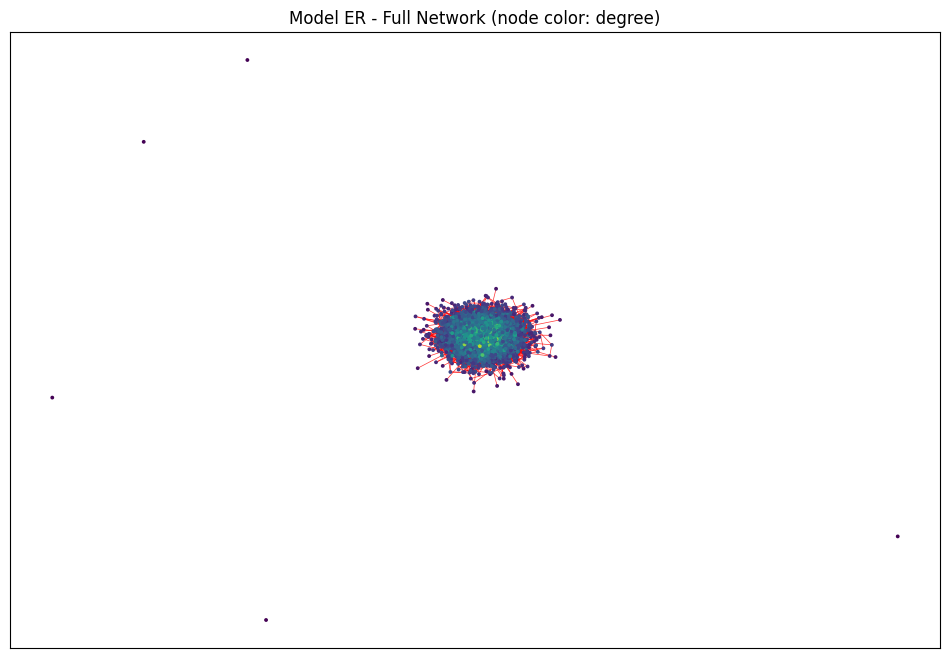

Model ER - Liczba społeczności: 28


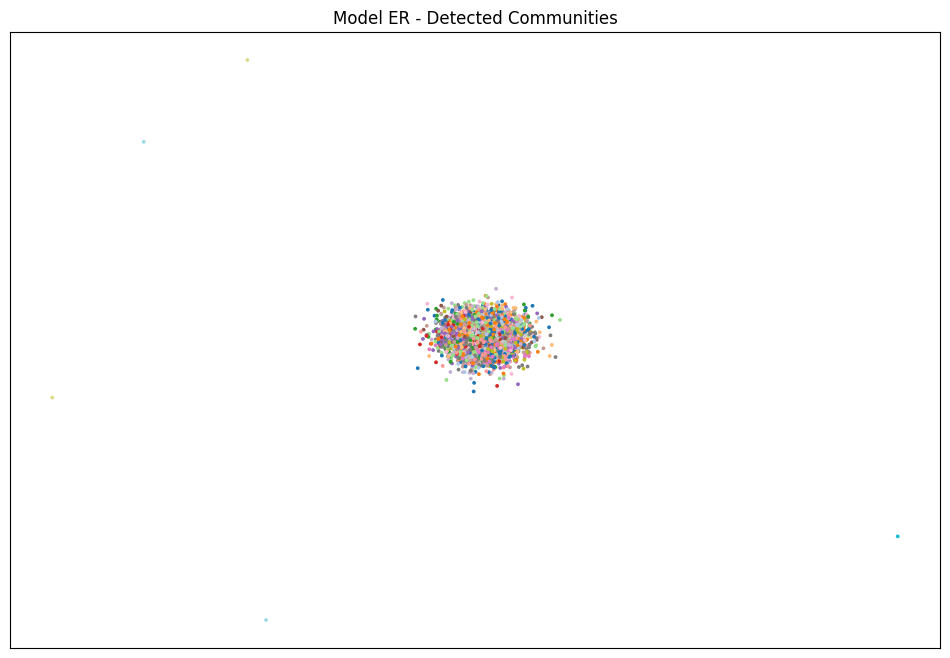

In [50]:
process_network(G_ernx,G_er, "Model ER")

#### Dużo nodów co ma inny kolor niż fioletowy, struktura kulista sugeruje, że wiele nodów jest w podobnej odległości od "środka" nie ma praktycznie żadnych odstających nodów, nie ma nodów wyjątkowo daleko od siebie, brak wyraźnie wyodrębnionych społeczności

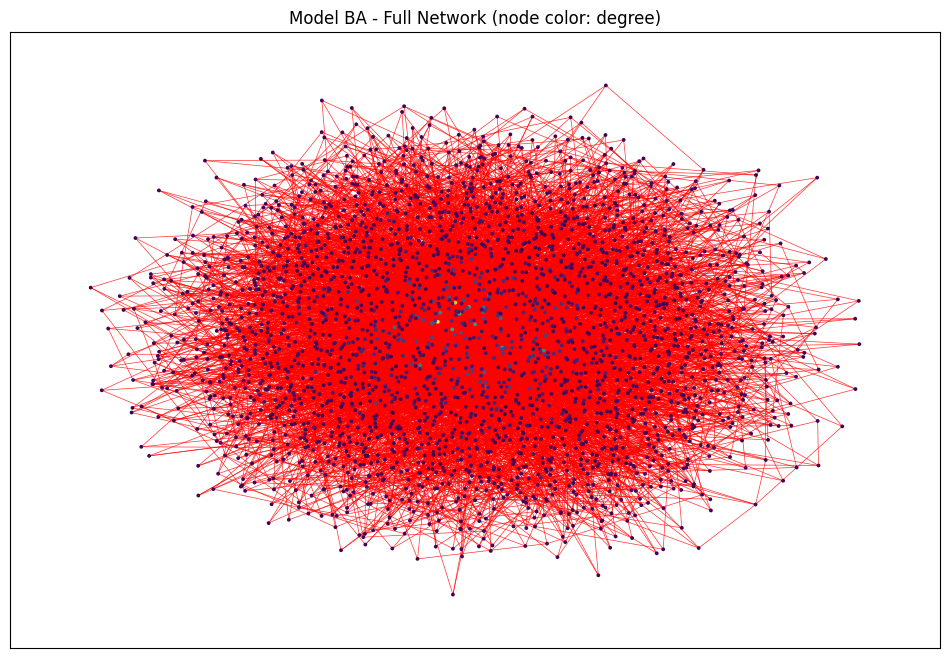

Model BA - Liczba społeczności: 20


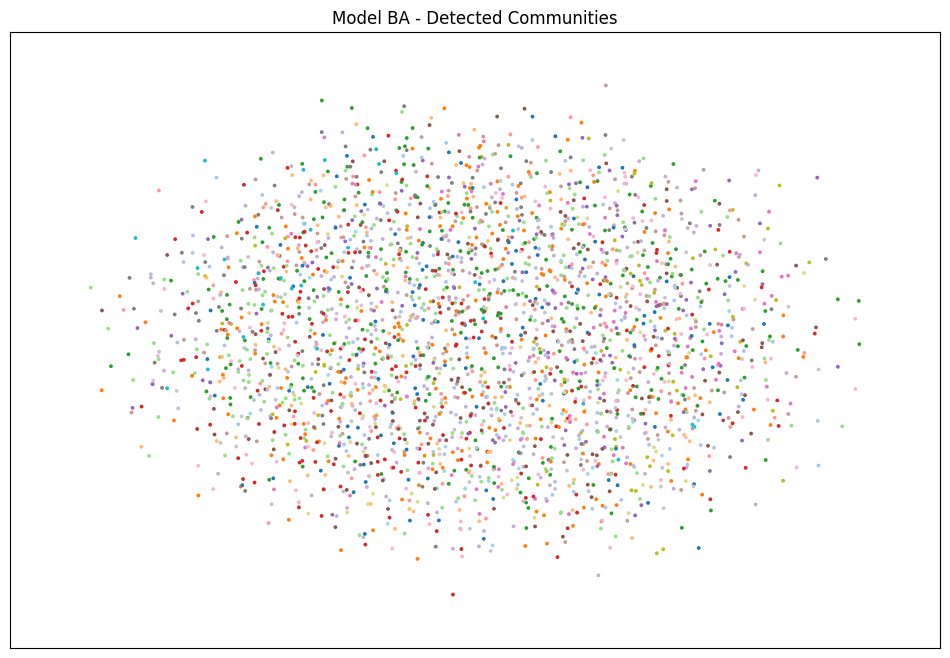

In [51]:
process_network(G_banx,G_ba, "Model BA")

#### Znowu bardziej kulista struktura, znowu widąć nody, które mają więcej połączeń, ale dużo mniej niż er. Znowu nie ma nodów, które są wyjatkowo daleko od jakiegoś innego node, na obrzeżach nody łaćzą się głównie ze środkiem nie ze sobą.

#### Co ciekawe tu jest na tyle mało grup (nic dziwnego jak mostów i prze. nie było), dzięki temu jest idealnie 20 grup, więc ma się wrazenie, że grupy na tej wizualizacji wyglądają na tak losowe, słabo skupione przestrzennie. Węzły należące do jednej grupy są rozproszone po całym grafie, przez co trudno zauważyć wyraźne granice społeczności. Silne połaczenia lokalne.